In [1]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os

# Pre-processing the data 

In [2]:
# Uploading csv file
df = pd.read_csv("bank.csv")
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


In [4]:
#Converting list of column names into column bariables
col = re.sub(";", " ", df.columns[0])
col = re.sub("\"", "", col)
col = col.split()

# Data cleaning for each row
def cln_data(row):
    row = re.sub(";", " ", row)
    row = re.sub("\"", "", row)
    row = row.split()
    return row

data = df.copy()
data.iloc[:,0] = data.iloc[:,0].map(lambda x: cln_data(x))
data

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"[30, unemployed, married, primary, no, 1787, n..."
1,"[33, services, married, secondary, no, 4789, y..."
2,"[35, management, single, tertiary, no, 1350, y..."
3,"[30, management, married, tertiary, no, 1476, ..."
4,"[59, blue-collar, married, secondary, no, 0, y..."
...,...
4516,"[33, services, married, secondary, no, -333, y..."
4517,"[57, self-employed, married, tertiary, yes, -3..."
4518,"[57, technician, married, secondary, no, 295, ..."
4519,"[28, blue-collar, married, secondary, no, 1137..."


In [5]:
# Filling the values from row list and creating the column 
ind = 0
for row in data.iloc[:,0]:
    if len(row) == 17:
        i = 0
        for col_ in col:
            data.loc[ind,col_] = row[i]
            i += 1
    ind += 1
    
data.drop(data.columns[0], axis=1, inplace=True)
df_c = data.copy()
df_c

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
#converting datatypes of numerical varaibles which were object dtypes
convert_dtype = {"age":int, "balance":int, "day":int, "duration":int, "campaign":int, "pdays":int, "previous":int}
df_c = df_c.astype(convert_dtype)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int32 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int32 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int32 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int32 
 12  campaign   4521 non-null   int32 
 13  pdays      4521 non-null   int32 
 14  previous   4521 non-null   int32 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int32(7), object(10)
memory usage: 476.9+ KB


In [7]:
df_c.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
#Creating list of categorical and numerical columns
categorical_cols = [col for col in df_c.columns if df_c[col].dtype == "O"]
numerical_cols = [col for col in df_c.columns if df_c[col].dtype != "O"]

# EDA of numerical columns
df_c.loc[:,numerical_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


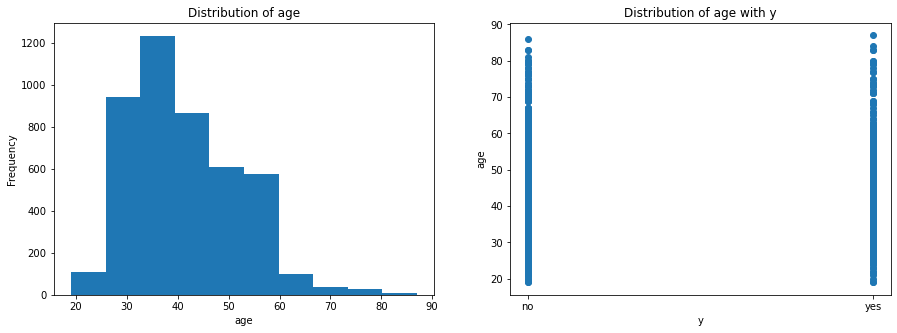

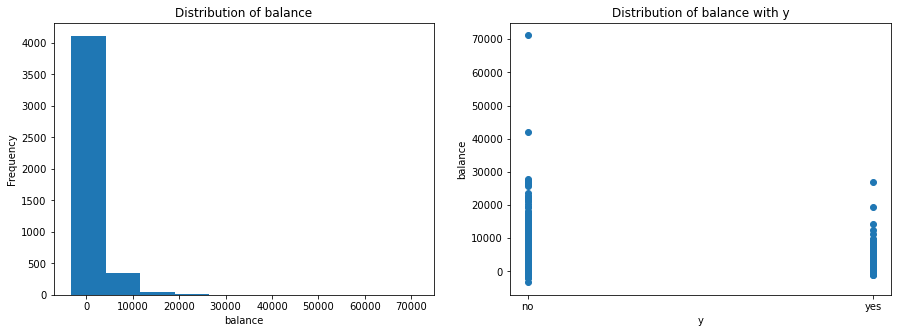

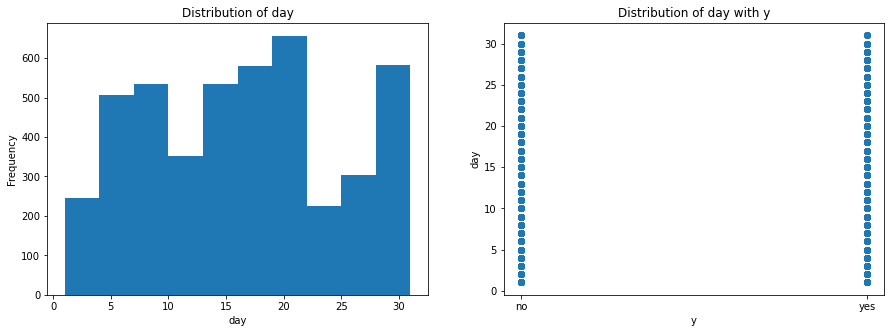

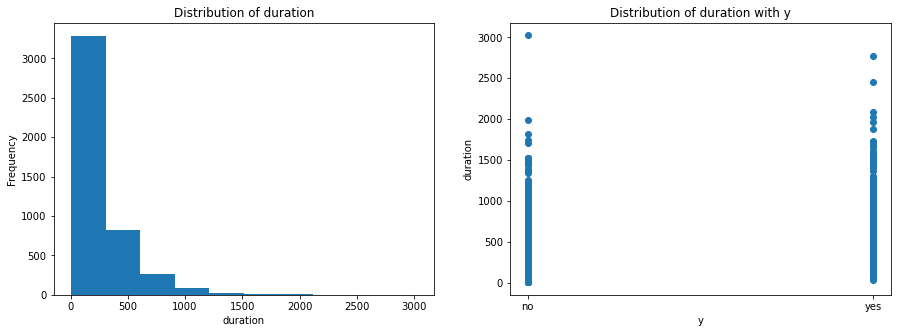

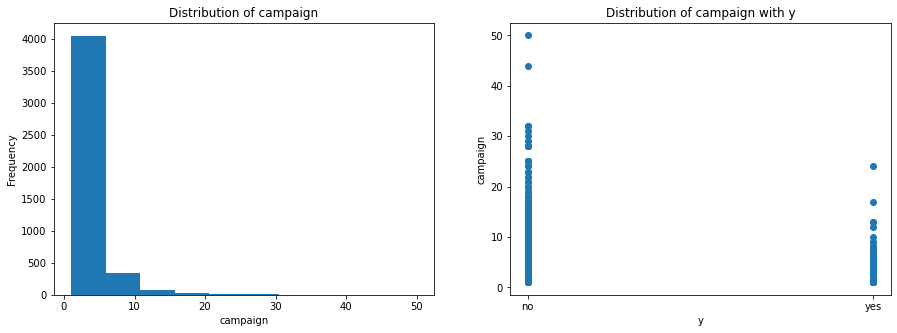

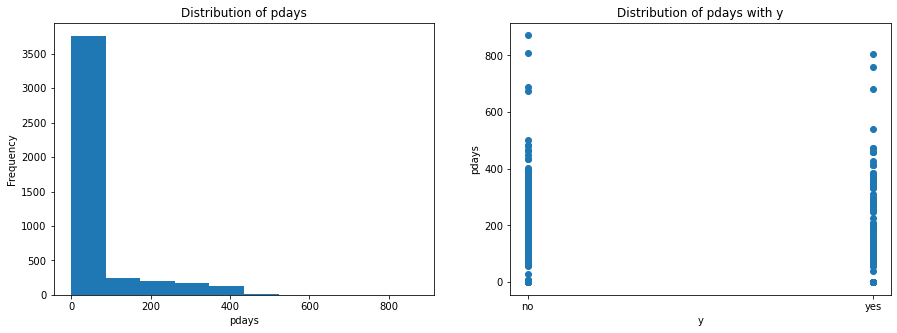

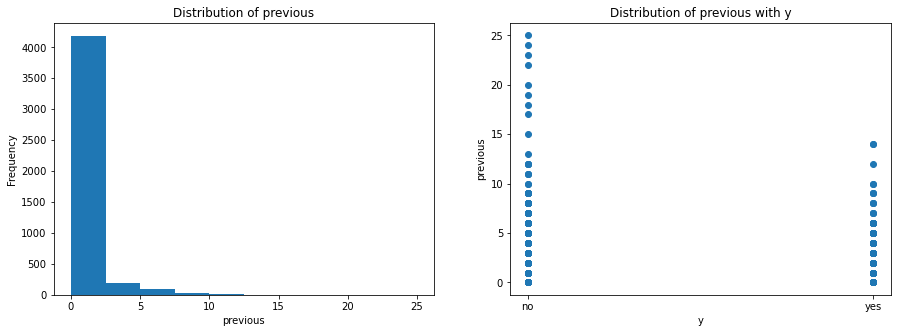

In [9]:
# Distributing values in numeric column
for col in numerical_cols:
    plt.figure(figsize=(15,5))
    right = plt.subplot(1,2,1)
    plt.hist(df_c[col])
    right.set_ylabel("Frequency")
    right.set_xlabel(col)
    right.set_title(f"Distribution of {col}")
    left = plt.subplot(1,2,2)
    plt.scatter(df_c["y"],df_c[col])
    left.set_ylabel(col)
    left.set_xlabel("y")
    left.set_title(f"Distribution of {col} with y")
    plt.show()

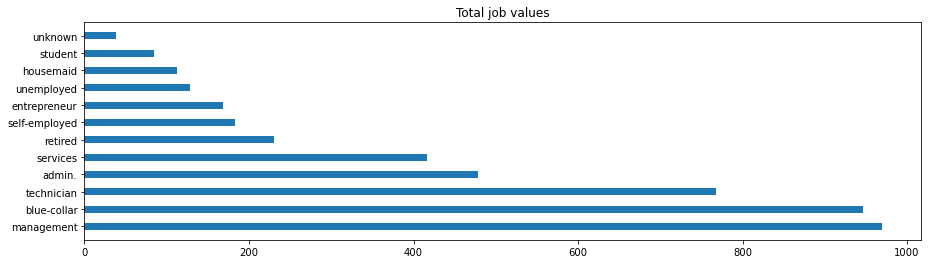

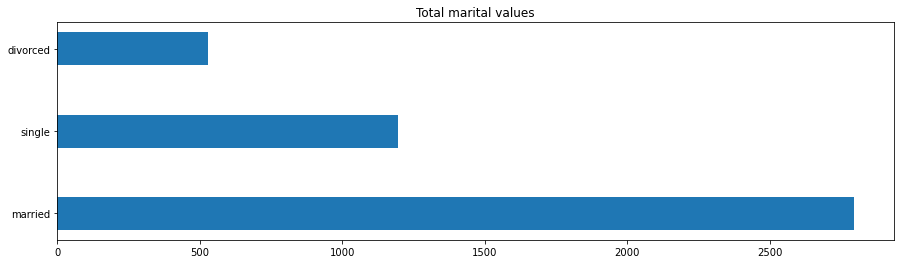

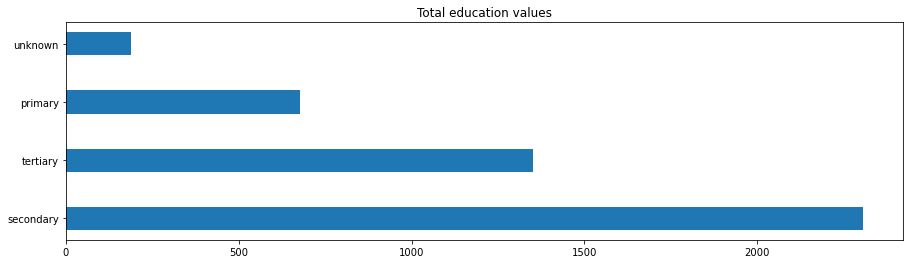

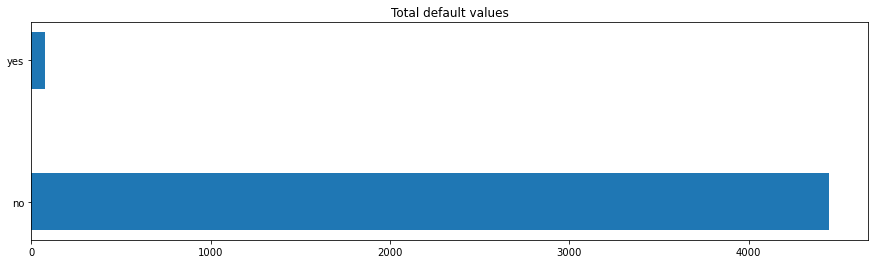

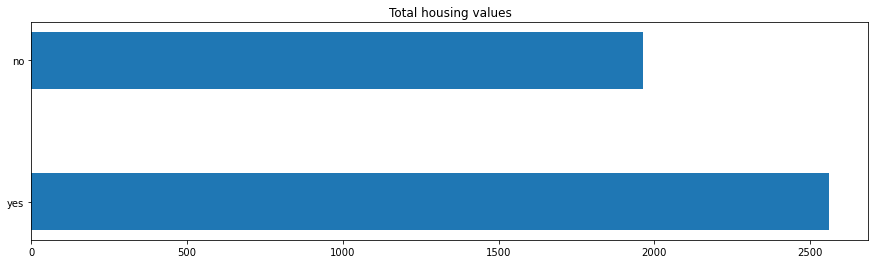

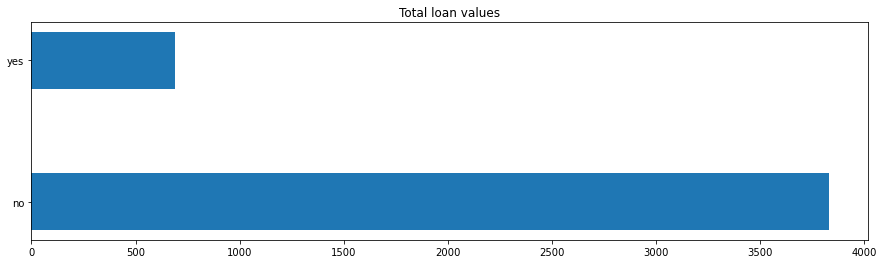

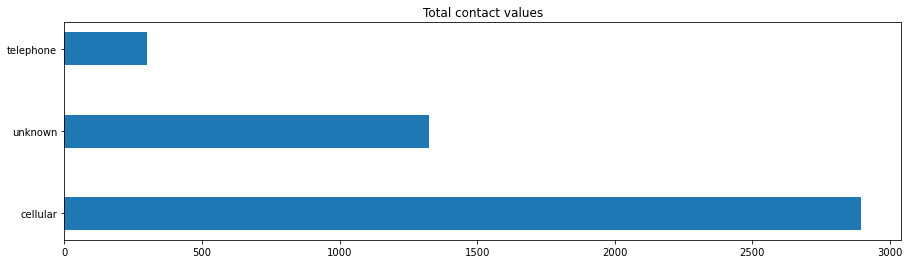

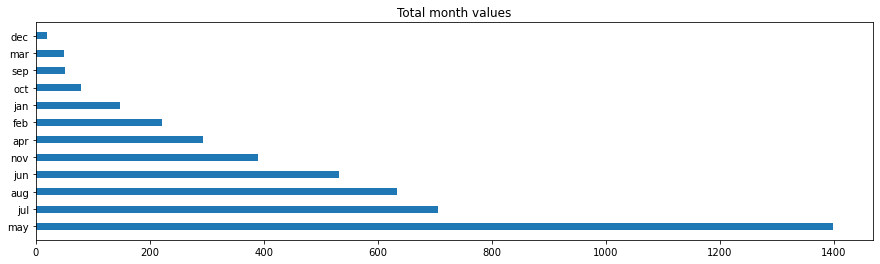

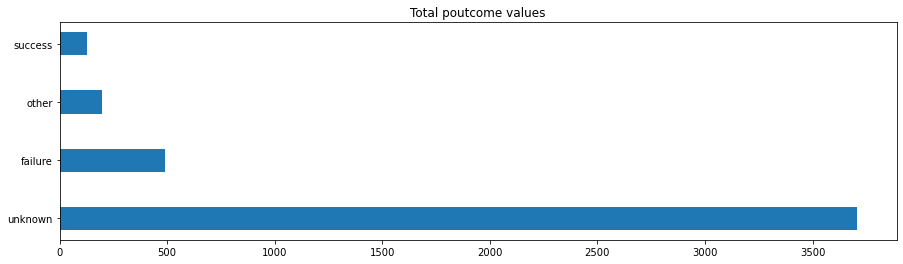

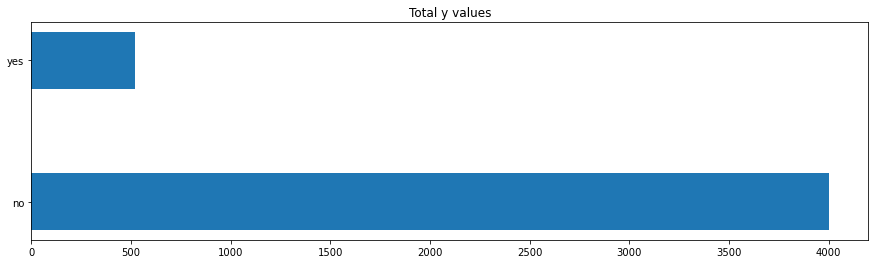

In [10]:
#checking total unique values in categorical column 
for col in categorical_cols:
    uni_values = df_c[col].value_counts()
    plt.figure(figsize=(15, 4))
    plt.barh(uni_values.index , uni_values, height=0.4)
    plt.title(f"Total {col} values")
    plt.show()

# Data Encoding

In [11]:
# Convert y (target value) to numeric - as one hot encoding can't be used
df_c["y"] = df_c["y"].map(lambda x: 1 if x=="yes" else 0)

# Day and Month columns combined to show day of the year as both represent last contact
# Previous month days combined together with current month as we are combining days with month
months = {"jan":0, "feb":31, "mar":59, "apr":90, "may":120, "jun":151, "jul":181, "aug":212, "sep":243, "oct":273, "nov":304, "dec":334}
df_c["month"] = df_c["month"].map(lambda x: months[x])
df_c["day_of_year"] = df_c["day"] + df_c["month"]
df_c.drop(["month","day"], axis=1, inplace=True)

# Converting the duration column from second to minutes
df_c["duration"] = df_c["duration"] / 60

# Change the order of columns
df_c = df_c.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,14]]
df_c.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,1.316667,1,-1,0,unknown,292,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,3.666667,1,339,4,failure,131,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,3.083333,1,330,1,failure,106,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3.316667,4,-1,0,unknown,154,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,3.766667,1,-1,0,unknown,125,0


In [12]:
# We will use count encoder to transform the categorical variable into frequency of subcategory
from category_encoders.count import CountEncoder
categorical_cols.remove("month")
categorical_cols.remove("y")
col_to_transform = [col for col in categorical_cols if col != "day_of_year" and col != "y"]

CEnc = CountEncoder(cols=col_to_transform, normalize=True)
trans_data = CEnc.fit_transform(X=df_c)

trans_data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year,y
0,30,0.028312,0.618668,0.149967,0.98319,1787,0.433975,0.847158,0.640566,1.316667,1,-1,0,0.819509,292,0
1,33,0.092236,0.618668,0.510064,0.98319,4789,0.566025,0.152842,0.640566,3.666667,1,339,4,0.108383,131,0
2,35,0.214333,0.264543,0.298607,0.98319,1350,0.566025,0.847158,0.640566,3.083333,1,330,1,0.108383,106,0
3,30,0.214333,0.618668,0.298607,0.98319,1476,0.566025,0.152842,0.292856,3.316667,4,-1,0,0.819509,154,0
4,59,0.209246,0.618668,0.510064,0.98319,0,0.566025,0.847158,0.292856,3.766667,1,-1,0,0.819509,125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0.092236,0.618668,0.510064,0.98319,-333,0.566025,0.847158,0.640566,5.483333,5,-1,0,0.819509,211,0
4517,57,0.040478,0.618668,0.298607,0.01681,-3313,0.566025,0.152842,0.292856,2.550000,1,-1,0,0.819509,129,0
4518,57,0.169874,0.618668,0.510064,0.98319,295,0.433975,0.847158,0.640566,2.516667,11,-1,0,0.819509,231,0
4519,28,0.209246,0.618668,0.510064,0.98319,1137,0.433975,0.847158,0.640566,2.150000,4,211,3,0.043574,37,0


# Train test split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(trans_data.iloc[:,:-1], trans_data.iloc[:,-1], 
                                                    test_size=0.2, stratify=trans_data.iloc[:,-1])

# Fine tuning the model by different parameters or technique to improve performance

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

Ran_fr = RandomForestClassifier()
Ran_fr.fit(X_train, Y_train)
result = Ran_fr.predict(X_test)
print(classification_report(Y_test, result))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       801
           1       0.62      0.30      0.40       104

    accuracy                           0.90       905
   macro avg       0.77      0.64      0.67       905
weighted avg       0.88      0.90      0.88       905



# Feature Engineering

Text(0.5, 1.0, 'Feature Importance-columns')

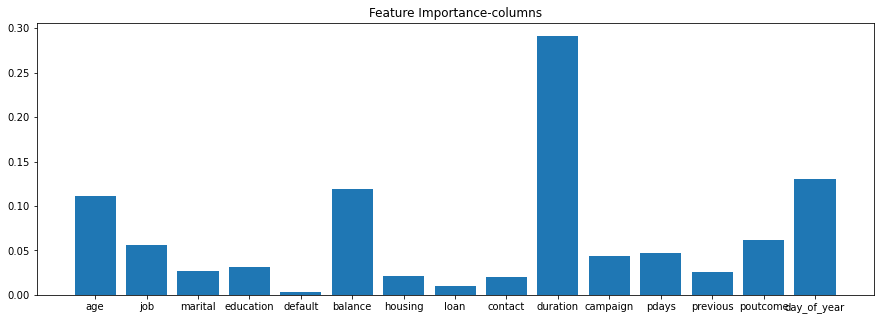

In [16]:
plt.figure(figsize=(15,5))
plt.bar(X_train.columns, Ran_fr.feature_importances_)
plt.title("Feature Importance-columns")

In [17]:
X_train.drop(["default"], axis=1, inplace=True)
X_train.head()

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year
46,55,0.209246,0.618668,0.149967,145,0.433975,0.847158,0.066578,0.983333,3,5,2,0.043574,33
3827,51,0.214333,0.618668,0.298607,-892,0.566025,0.152842,0.640566,4.133333,2,-1,0,0.819509,226
1934,27,0.169874,0.264543,0.510064,489,0.566025,0.847158,0.640566,5.933333,4,-1,0,0.819509,211
1854,34,0.214333,0.264543,0.298607,2646,0.433975,0.847158,0.640566,2.366667,1,-1,0,0.819509,104
3753,44,0.209246,0.618668,0.510064,878,0.566025,0.847158,0.640566,2.166667,1,-1,0,0.819509,153


# Random Forest

In [18]:
from sklearn.model_selection import GridSearchCV

Ran_FC = RandomForestClassifier()
parameters = {"n_estimators":[70,80,90,100,110,120],
              "max_depth":[4,5,6,7]}

G_RF = GridSearchCV(estimator=Ran_FC, param_grid=parameters)
G_RF.fit(X_train, Y_train)

print(f"Random forest Best Score is {G_RF.best_score_}")

Random forest Best Score is 0.8946356112881411


In [19]:
# Model Evaluation
X_test.drop(["default"], axis=1, inplace=True)
ypred_Ran_F = G_RF.predict(X_test)
print(f"Classification Report of Random forest \n{classification_report(Y_test, ypred_Ran_F)}")

Classification Report of Random forest 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       801
           1       0.78      0.07      0.12       104

    accuracy                           0.89       905
   macro avg       0.83      0.53      0.53       905
weighted avg       0.88      0.89      0.85       905



In [20]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

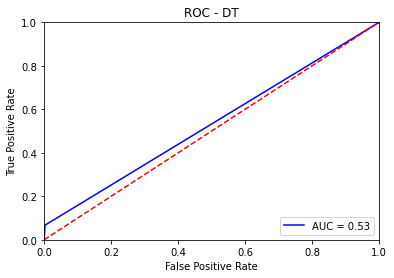

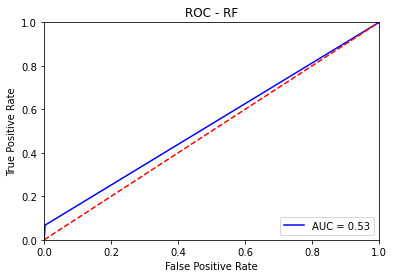

In [22]:
# AUC ROC -Random forest
# fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(Y_test, ypred_Ran_F)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# AUC ROC -Random forest
#fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(Y_test, ypred_Ran_F)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting 

In [23]:

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

parameters = {"n_estimators":[70,80,90,100,110,120],
              "learning_rate":[0.05,0.07,0.1,0.13,0.15,0.2],
              "max_depth":[4,5,6,7]}

GBC = GradientBoostingClassifier()
Grid_GB = GridSearchCV(estimator=GBC, param_grid=parameters, cv=4)
Grid_GB.fit(X_train, Y_train)

print(f"Best Score for Gradient boost is {Grid_GB.best_score_}")

Best Score for Gradient boost is 0.8976769911504424


In [24]:
ypred_GB = Grid_GB.predict(X_test)
print(f"Classification Report of Gradient Boosting Classifier \n\n{classification_report(Y_test, ypred_GB)}")

Classification Report of Gradient Boosting Classifier 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       801
           1       0.57      0.46      0.51       104

    accuracy                           0.90       905
   macro avg       0.75      0.71      0.73       905
weighted avg       0.89      0.90      0.89       905



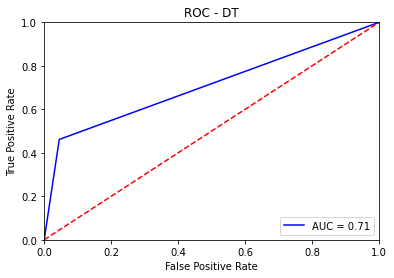

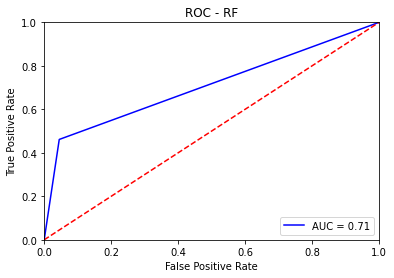

In [25]:
# AUC ROC - Gradient boost
# fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(Y_test,ypred_GB)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# AUC ROC - Gradient boost
#fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(Y_test, ypred_GB)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
 
LR = LogisticRegression()
LR.fit(X_train, Y_train)
ypred_LR = LR.predict(X_test)
print(f"Classification Report of Logistic Regression Classifier \n\n{classification_report(Y_test, ypred_LR)}")

Classification Report of Logistic Regression Classifier 

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       801
           1       0.47      0.09      0.15       104

    accuracy                           0.88       905
   macro avg       0.68      0.54      0.54       905
weighted avg       0.84      0.88      0.85       905



C:\Users\Kriti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


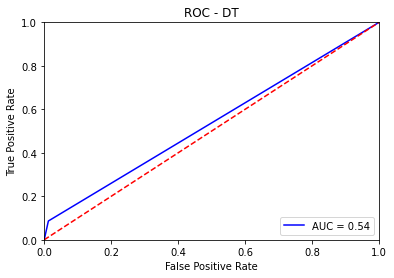

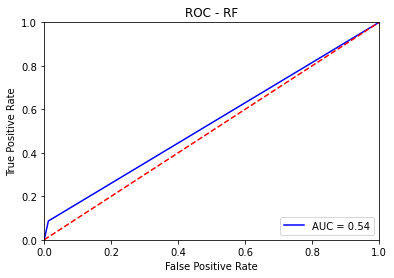

In [27]:
# AUC ROC - Logistic Regression
#fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(Y_test, ypred_LR)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# AUC ROC -Logistic Regression
#fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(Y_test, ypred_LR)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Limitation - 

1.In Random forest if there is Large number of trees can make the algorithm too slow. 
2.Logistic regression is not good with continuous value
3.Gradient boost is prone to over fitting


Future work- 
1. Logistic regression is great for prediction and classification problem.
2. Gradient boost best for classification and regression problems.
3. Random forest is used to solve regression and classification problem.